In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib as mpl
import scipy

In [2]:
comb_pred = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_test.npy").reshape((20,-1))
whole_pred = np.load("/scratch/yjk27/CA1_clust4-60_AP/whole_pred/gru_l20_h40_0.2ms_test.npy").reshape((20,-1))
tcn_pred = np.load("/scratch/yjk27/CA1_clust4-60_AP/tcnmulti_pred/gru_l20_h40_0.2ms_test.npy").reshape((20,-1))
joint = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/OLD_gru_l20_h40_0.2ms_test_joint.npy").reshape((20,-1))
spk = np.load("/scratch/yjk27/CA1_clust4-60_AP/data/spike_train_0.2ms.npy")[980*50000:].reshape((20,-1))
perf_pred = np.copy(spk)

pred_beniag = np.load("/scratch/yjk27/CA1_clust4-60_AP/y_spikes_hat.npy")
spk_beniag = np.load("/scratch/yjk27/CA1_clust4-60_AP/y_spikes_GT.npy")

fpr_comb_pred, tpr_comb_pred, _ = roc_curve(spk.flatten(), comb_pred.flatten())
fpr_whole_pred, tpr_whole_pred, _ = roc_curve(spk.flatten(), whole_pred.flatten())
fpr_joint, tpr_joint, _ = roc_curve(spk.flatten(), joint.flatten())
fpr_tcn_pred, tpr_tcn_pred, _ = roc_curve(spk.flatten(), tcn_pred.flatten())
fpr_beniag, tpr_beniag, _ = roc_curve(spk_beniag.flatten(), pred_beniag.flatten())
beniag_idx = np.where(np.sum(spk_beniag,1) > 0)[0]

#rocarea_comb_pred = roc_auc_score(spk.flatten(), comb_pred.flatten())
#rocarea_whole_pred = roc_auc_score(spk.flatten(), whole_pred.flatten())
#rocarea_joint = roc_auc_score(spk.flatten(), joint.flatten())
#rocarea_tcn_pred = roc_auc_score(spk.flatten(), tcn_pred.flatten())

rocarea_array = np.zeros((20,4))
beniag_array = np.zeros((beniag_idx.shape[0]))

for i in tnrange(20):
    rocarea_array[i,1] = roc_auc_score(spk[i], comb_pred[i])
    rocarea_array[i,0] = roc_auc_score(spk[i], whole_pred[i])
    rocarea_array[i,2] = roc_auc_score(spk[i], joint[i])
    rocarea_array[i,3] = roc_auc_score(spk[i], tcn_pred[i])
for i in tnrange(beniag_idx.shape[0]):
    beniag_array[i] = roc_auc_score(spk_beniag[beniag_idx[i]], pred_beniag[beniag_idx[i]])

#beniag thresh = 0.1
#comb_pred thresh = 0.04
#whole_pred thresh = 0.04
#joint_pred thresh = 0.04
#tcn_pred thresh = 0.04
spk_idx = np.where(spk.flatten() > 0)[0]
beniag_spk_idx = np.where(spk_beniag.flatten() > 0)[0]
comb_pred_corr = np.zeros((200))
whole_pred_corr = np.zeros((200))
joint_corr = np.zeros((200))
tcn_pred_corr = np.zeros((200))
beniag_corr = np.zeros((40))
perf_corr = np.zeros((200))

comb_pred_thresh = np.zeros((comb_pred.flatten().size))
whole_pred_thresh = np.zeros((whole_pred.flatten().size))
joint_thresh = np.zeros((joint.flatten().size))
beniag_thresh = np.zeros((spk_beniag.flatten().size))
tcn_pred_thresh = np.zeros((whole_pred.flatten().size))

comb_pos_idx = np.where(comb_pred.flatten() >= 0.04)[0]
whole_pos_idx = np.where(whole_pred.flatten() >= 0.04)[0]
joint_idx = np.where(joint.flatten() >= 0.04)[0]
beniag_pos_idx = np.where(pred_beniag.flatten() >= 0.1)[0]
tcn_pos_idx = np.where(tcn_pred.flatten() >= 0.04)[0]

comb_pred_thresh[comb_pos_idx] = 1
whole_pred_thresh[whole_pos_idx] = 1
joint_thresh[joint_idx] = 1
beniag_thresh[beniag_pos_idx] = 1
tcn_pred_thresh[tcn_pos_idx] = 1

for i in range(spk_idx.size):
    t = spk_idx[i]
    comb_pred_corr += comb_pred_thresh[t-100:t+100]
    whole_pred_corr += whole_pred_thresh[t-100:t+100]
    joint_corr += joint_thresh[t-100:t+100]
    perf_corr += perf_pred.flatten()[t-100:t+100]
    tcn_pred_corr += tcn_pred_thresh[t-100:t+100]
for i in range(beniag_spk_idx.size):
    t = beniag_spk_idx[i]
    beniag_corr += beniag_thresh[t-20:t+20]

In [8]:
print(pre_na_sub.shape)

(20, 5, 50000)


In [24]:
spk = np.load("/scratch/yjk27/CA1_clust4-60_AP/data/spike_train_0.2ms.npy")[980*50000:].reshape(20,50000)

pre_wind = 10 * 5
post_wind = 50 * 5

pre_na_sub_spk_avg = np.zeros((4, pre_wind + post_wind))
pre_nona_sub_spk_avg = np.zeros((4, pre_wind + post_wind))
post_na_sub_spk_avg = np.zeros((4, pre_wind + post_wind))
post_nona_sub_spk_avg = np.zeros((4, pre_wind + post_wind))

pre_na_sub_spk = np.zeros((4, 4, pre_wind + post_wind))
pre_nona_sub_spk = np.zeros((4, 4, pre_wind + post_wind))
post_na_sub_spk = np.zeros((4, 4, pre_wind + post_wind))
post_nona_sub_spk = np.zeros((4, 4, pre_wind + post_wind))

for i in range(20):
    spk_idx = np.where(spk[i] == 1)[0]
    for s in range(spk_idx.size):
        if s < spk_idx.size-1:
            if (spk_idx[s+1] - spk_idx[s] < 2 * 5):
                next_close = True
                print(spk_idx[s], spk_idx[s+1])
            else:
                next_close = False
        elif s == spk_idx.size-1:
            next_close = False
            
                
        if next_close:
            interval = spk_idx[s+1] - spk_idx[s] - 2*5
            pre_na_sub_spk_avg[:,:interval] += pre_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            pre_nona_sub_spk_avg[:,:interval] += pre_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            post_na_sub_spk_avg[:,:interval] += post_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            post_nona_sub_spk_avg[:,:interval] += post_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            
            if s < 4:
                pre_na_sub_spk[:,s,:interval] = pre_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
                pre_nona_sub_spk[:,s,:interval] = pre_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
                post_na_sub_spk[:,s,:interval] = post_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
                post_nona_sub_spk[:,s,:interval] = post_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s] + interval]
            
        elif not next_close:
            pre_na_sub_spk_avg += pre_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            pre_nona_sub_spk_avg += pre_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            post_na_sub_spk_avg += post_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            post_nona_sub_spk_avg += post_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            
            if s < 4:
                pre_na_sub_spk[:,s] += pre_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
                pre_nona_sub_spk[:,s] += pre_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
                post_na_sub_spk[:,s] += post_na_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
                post_nona_sub_spk[:,s] += post_nona_sub[i,1:,spk_idx[s]-pre_wind:spk_idx[s]+post_wind]
            
pre_na_sub_spk_avg /= np.sum(spk)
pre_nona_sub_spk_avg /= np.sum(spk)
post_na_sub_spk_avg /= np.sum(spk)
post_nona_sub_spk_avg /= np.sum(spk)

In [ ]:
pre_na_sub = np.load("/scratch/yjk27/CA1_clust4-60/mono/gru_s5_h20_output.npz")["sub_out"]
pre_nona_sub = np.load("/scratch/yjk27/CA1_clust4-60_noNA/mono/gru_s5_h20_output.npz")["sub_out"]
post_na_sub = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_V_test_joint_output.npz")["na_sub_out"]
post_nona_sub = np.load("/scratch/yjk27/CA1_clust4-60_AP/comb_pred/gru_l20_h40_0.2ms_V_test_joint_output.npz")["nona_sub_out"]

In [ ]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '21'

fig = plt.figure(figsize = (23,33))
gs = fig.add_gridspec(10,12, wspace=1.7, hspace=1)
ax1 = fig.add_subplot(gs[:2,4:8])
ax2 = fig.add_subplot(gs[:2,:3])
ax3 = fig.add_subplot(gs[:2,9:])

ax41 = fig.add_subplot(gs[2:4,:3])
ax42 = fig.add_subplot(gs[2:4,3:6])
ax43 = fig.add_subplot(gs[2:4,6:9])
ax44 = fig.add_subplot(gs[2:4,9:])
ax51 = fig.add_subplot(gs[4:6,:3])
ax52 = fig.add_subplot(gs[4:6,3:6])
ax53 = fig.add_subplot(gs[4:6,6:9])
ax54 = fig.add_subplot(gs[4:6,9:])

ax61 = fig.add_subplot(gs[6,:6])
ax62 = fig.add_subplot(gs[7,:6])
ax63 = fig.add_subplot(gs[8,:6])
ax64 = fig.add_subplot(gs[9,:6])
ax71 = fig.add_subplot(gs[6,6:])
ax72 = fig.add_subplot(gs[7,6:])
ax73 = fig.add_subplot(gs[8,6:])
ax74 = fig.add_subplot(gs[9,6:])

color1 = "blue"
color2 = "red"
color3 = "purple"
color4 = "darkorange"
color5 = "black"

colors = [color1, color2, color3, color4, color5]

bp1 = ax1.boxplot(rocarea_array[:,0], positions=[1], widths = 0.6, patch_artist=True)
bp2 = ax1.boxplot(rocarea_array[:,1], positions=[2], widths = 0.6, patch_artist=True)
bp3 = ax1.boxplot(rocarea_array[:,2], positions=[3], widths = 0.6, patch_artist=True)
bp4 = ax1.boxplot(rocarea_array[:,3], positions=[4], widths = 0.6, patch_artist=True)
bp5 = ax1.boxplot(beniag_array, positions=[5], widths = 0.6, patch_artist=True)
bp_list = [bp1, bp2, bp3, bp4, bp5]

for i in range(5):
    plt.setp(bp_list[i]['boxes'], facecolor=colors[i])
    plt.setp(bp_list[i]['boxes'], alpha=0.5)
    plt.setp(bp_list[i]["fliers"], markeredgecolor=colors[i])
    plt.setp(bp_list[i]["boxes"], color=colors[i])
    plt.setp(bp_list[i]["medians"], color=colors[i])
    for j in range(2):
        plt.setp(bp_list[i]['whiskers'][j], color=colors[i])
        plt.setp(bp_list[i]['caps'][j], color=colors[i])

ax1.set_xticklabels(["$\mathregular{v_{soma}}$",
                     "$\mathregular{v_{noNa}}$\n+$\mathregular{v_{Na}}$",
                     "$\mathregular{v_{noNa}}$\n+$\mathregular{v_{Na}}$\n(w/ bAP)",
                     "$\mathregular{v_{soma}}$\n(TCN)",
                     "Beniaguev\net al."], rotation=0)
ax1.set_ylabel("ROC AUC")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_ylim(0,1)
ax1.tick_params(axis="x", length=0)
ax1.set_yticks(np.arange(0,1.01,0.25))

ins = ax1.inset_axes([0.15,0.15,0.7,0.6])
bp1 = ins.boxplot(rocarea_array[:,0], positions=[1], widths = 0.6, patch_artist=True)
bp2 = ins.boxplot(rocarea_array[:,1], positions=[2], widths = 0.6, patch_artist=True)
bp3 = ins.boxplot(rocarea_array[:,2], positions=[3], widths = 0.6, patch_artist=True)
bp4 = ins.boxplot(rocarea_array[:,3], positions=[4], widths = 0.6, patch_artist=True)
bp5 = ins.boxplot(beniag_array, positions=[5], widths = 0.6, patch_artist=True)
bp_list = [bp1, bp2, bp3, bp4, bp5]

for i in range(5):
    plt.setp(bp_list[i]['boxes'], facecolor=colors[i])
    plt.setp(bp_list[i]['boxes'], alpha=0.5)
    plt.setp(bp_list[i]["fliers"], markeredgecolor=colors[i])
    plt.setp(bp_list[i]["boxes"], color=colors[i])
    plt.setp(bp_list[i]["medians"], color=colors[i])
    for j in range(2):
        plt.setp(bp_list[i]['whiskers'][j], color=colors[i])
        plt.setp(bp_list[i]['caps'][j], color=colors[i])

ins.spines['right'].set_visible(False)
ins.spines['top'].set_visible(False)
ins.spines['bottom'].set_visible(False)
ins.set_ylim(0.95,1)
ins.tick_params(axis="x", length=0)
ins.set_xticks([])
ins.set_yticks(np.arange(0.95,1.001,0.05))

ax2.plot(fpr_whole_pred, tpr_whole_pred, linewidth=1, color=color1)
ax2.plot(fpr_comb_pred, tpr_comb_pred, linewidth=1, color=color2)
ax2.plot(fpr_joint, tpr_joint, linewidth=1, color=color3)
ax2.plot(fpr_tcn_pred, tpr_tcn_pred, linewidth=1, color=color4)
ax2.plot(fpr_beniag, tpr_beniag, linewidth=1, color=color5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim(0,1.01)
ax2.set_xlim(0,1)
ax2.set_xlabel("false alarm rate")
ax2.set_ylabel("hit rate")
ax2.set_xticks(np.arange(0,1.01,0.25))
ax2.set_yticks(np.arange(0,1.01,0.25))

ins = ax2.inset_axes([0.3,0.15,0.75,0.6])
ins.plot(fpr_whole_pred, tpr_whole_pred, linewidth=1, color=color1)
ins.plot(fpr_comb_pred, tpr_comb_pred, linewidth=1, color=color2)
ins.plot(fpr_joint, tpr_joint, linewidth=1, color=color3)
ins.plot(fpr_tcn_pred, tpr_tcn_pred, linewidth=1, color=color4)
ins.plot(fpr_beniag, tpr_beniag, linewidth=1, color=color5)
ins.spines['right'].set_visible(False)
ins.spines['top'].set_visible(False)
ins.set_ylim(0.9,1.001)
ins.set_xlim(0,0.1)
ins.set_xticks([0,0.1])
ins.set_yticks([0.9,1])
#ax2.annotate("p = 0.00171", (0.4,0.85))

ax3.plot(np.arange(-20,20,1), beniag_corr/25, color="black", linewidth=1)
ax3.plot(np.arange(-20,20,0.2), comb_pred_corr/5, color="red", linewidth=1)
ax3.plot(np.arange(-20,20,0.2), whole_pred_corr/5, color="blue", linewidth=1)
ax3.plot(np.arange(-20,20,0.2), tcn_pred_corr/5, color="darkorange", linewidth=1)
ax3.plot(np.arange(-20,20,0.2), joint_corr/5, color="purple", linewidth=1)
#ax3.plot(np.arange(-20,20,0.2), perf_corr/5, color="black", linestyle="--", linewidth=1)
#ax3.plot(np.arange(-20,20,0.2), np.ones((200))* np.max(perf_corr)/5, linestyle="--", linewidth=1, color="black")
ax3.scatter(0, np.max(perf_corr)/5,  marker="o", s=100, color="black")
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_xticks([-20,0,20])
#ax3.set_yticks([0,10,20])
ax3.set_xlabel("time difference (ms)")
ax3.set_ylabel("spike rate (hz)")


###################
nona_ax_list = [ax41, ax42, ax43, ax44]
na_ax_list = [ax51, ax52, ax53, ax54]

for i in range(4):
    _,_,_,nona_img = nona_ax_list[i].hist2d(pre_nona_sub[:,i+1].flatten(),
              post_nona_sub[:,i+1].flatten(), cmap="jet",
                           norm=mpl.colors.LogNorm(), bins=25)
    _,_,_,na_img = na_ax_list[i].hist2d(pre_na_sub[:,i+1].flatten(),
              post_na_sub[:,i+1].flatten(), cmap="jet",
                         norm=mpl.colors.LogNorm(), bins=25)
    
    nona_ax_list[i].spines['right'].set_visible(False)
    nona_ax_list[i].spines['top'].set_visible(False)
    nona_ax_list[i].set_aspect(1)
    nona_ax_list[i].set_xlabel("$\mathregular{v_{noNa}}$")
    nona_ax_list[i].set_ylabel("$\mathregular{v_{noNa}}$ (w/ bAP)")
    nona_ax_list[i].set_title("subunit "+str(i+1))
    
    na_ax_list[i].spines['right'].set_visible(False)
    na_ax_list[i].spines['top'].set_visible(False)
    na_ax_list[i].set_aspect(1)
    na_ax_list[i].set_xlabel("$\mathregular{v_{Na}}$")
    na_ax_list[i].set_ylabel("$\mathregular{v_{Na}}$ (w/ bAP)")                             
                             
    
    nona_corr = np.corrcoef(pre_nona_sub[:,i+1].flatten(), post_nona_sub[:,i+1].flatten())[0,1]
    na_corr = np.corrcoef(pre_na_sub[:,i+1].flatten(), post_na_sub[:,i+1].flatten())[0,1]
    nona_ax_list[i].annotate("R² = "+str(np.round(nona_corr,4)), xy=(0.95,0.1),  xycoords='axes fraction',
            size=18, ha='right', va='top')
    na_ax_list[i].annotate("R² = "+str(np.round(na_corr,4)), xy=(0.95,0.1),  xycoords='axes fraction',
            size=18, ha='right', va='top')
    
    if i == 3:
        cbar = fig.colorbar(nona_img, ax=nona_ax_list, shrink=0.8, pad=0.025, fraction=0.01,
                             ticks=[1,10,100,1000,10000,100000,1000000])
        cbar.ax.set_yticklabels(["$\mathregular{10^0}$","$\mathregular{10^1}$",
                         "$\mathregular{10^2}$","$\mathregular{10^3}$",
                         "$\mathregular{10^4}$","$\mathregular{10^5}$","$\mathregular{10^6}$"])
        cbar = fig.colorbar(na_img, ax=na_ax_list, shrink=0.8, pad=0.025, fraction=0.01,
                            ticks=[1,10,100,1000,10000,100000,1000000])
        cbar.ax.set_yticklabels(["$\mathregular{10^0}$","$\mathregular{10^1}$",
                         "$\mathregular{10^2}$","$\mathregular{10^3}$",
                         "$\mathregular{10^4}$","$\mathregular{10^5}$","$\mathregular{10^6}$"])
    
##############
nona_ax_list = [ax61, ax62, ax63, ax64]
na_ax_list = [ax71, ax72, ax73, ax74]
for i in range(4):
    nona_ax_list[i].plot(np.arange(0,2000,0.2), pre_nona_sub[0,i+1,20000:30000], linewidth=1, color="red",
                         label="$\mathregular{v_{noNa}}$+$\mathregular{v_{Na}}$")
    nona_ax_list[i].plot(np.arange(0,2000,0.2), post_nona_sub[0,i+1,20000:30000], linewidth=1, color="purple",
                        label="$\mathregular{v_{noNa}}$+$\mathregular{v_{Na}}$ (w/ bAPs)")
    nona_ax_list[i].spines['right'].set_visible(False)
    nona_ax_list[i].spines['top'].set_visible(False)
    
    nona_ax_list[i].set_ylabel("subunit "+str(i+1)+"\noutput (a.u.)")
    
    na_ax_list[i].plot(np.arange(0,2000,0.2), pre_na_sub[0,i+1,20000:30000], linewidth=1, color="red")
    na_ax_list[i].plot(np.arange(0,2000,0.2), post_na_sub[0,i+1,20000:30000], linewidth=1, color="purple")
    na_ax_list[i].spines['right'].set_visible(False)
    na_ax_list[i].spines['top'].set_visible(False)
        
    if i == 0:
        nona_ax_list[i].legend(frameon=False)
        nona_ax_list[i].set_title("$\mathregular{v_{noNa}}$")
        na_ax_list[i].set_title("$\mathregular{v_{Na}}$")
    if i == 3:
        nona_ax_list[i].set_xlabel("time (ms)")
        na_ax_list[i].set_xlabel("time (ms)")
        
    ins = na_ax_list[i].inset_axes([0.85,0.5,0.15,0.75])
    ins.plot(np.arange(0,40,0.2), pre_na_sub[0,i+1,25600:25800], linewidth=1, color="red")
    ins.plot(np.arange(0,40,0.2), post_na_sub[0,i+1,25600:25800], linewidth=1, color="purple")
    ins.set_xticks([])
    ins.set_yticks([-0.2,0.6])
    if i == 1:
        ins.set_yticks([-0.7,0.1])
    
        
fig.tight_layout()
#plt.show()
#fig.savefig("/scratch/yjk27/dendrite/fig_ap/fig_ap_axosoma_raw.pdf", bbox_inches="tight", transparent=True)

In [11]:
true = np.load("/scratch/yjk27/CA1_clust4-60_AP/data/V_diff_stimseed1.npy").reshape(1000,50000)
dend = np.load("/scratch/yjk27/CA1_clust4-60_AP/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
dend = dend.reshape(4,1000,50001)[:,:,:50000]
print(dend.shape)

(4, 1000, 50000)


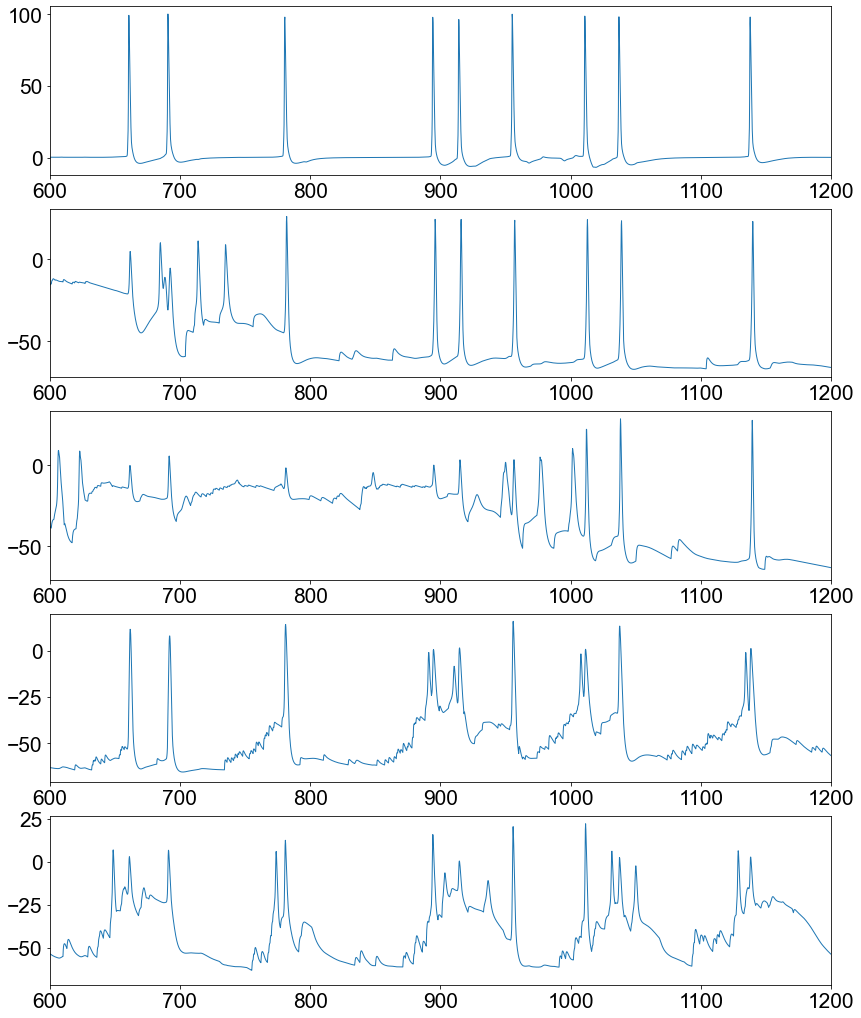

In [15]:
fig, axs = plt.subplots(nrows=5, figsize=(14,18))
plot_idx = 0

#axs[0].plot(np.arange(0,20,0.2), true[980+plot_idx,25650:25750], linewidth=1)
axs[0].plot(np.arange(0,2000,0.2), true[980+plot_idx,20000:30000], linewidth=1)
axs[0].set_xlim(600,1200)
for i in range(4):
    #axs[i+1].plot(np.arange(0,20,0.2), dend[i,980+plot_idx,25650:25750], linewidth=1)
    axs[i+1].plot(np.arange(0,2000,0.2), dend[i,980+plot_idx,20000:30000], linewidth=1)
    axs[i+1].set_xlim(600,1200)